# Reboot - SQL Advanced

Tonight we will work with the `blog.sqlite` database is available at this URL:  
`https://wagon-public-datasets.s3.amazonaws.com/sql_databases/blog.sqlite`

In [5]:
!curl https://wagon-public-datasets.s3.amazonaws.com/sql_databases/blog.sqlite > data/blog.sqlite

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  288k  100  288k    0     0   263k      0  0:00:01  0:00:01 --:--:--  266k    0     0   248k      0  0:00:01  0:00:01 --:--:--  251k


Let's have a look at our directory structure

In [6]:
!tree

.
├── README.md
├── data
│   └── blog.sqlite
└── recap.ipynb

2 directories, 3 files


## 1. Schema ERD

❓ Open the `data/blog.sqlite` in DBeaver, explore the schema and draw it on [kitt.lewagon.com/db](https://kitt.lewagon.com/db).

_TODO: Double click this cell and **paste** a screenshot of the schema for future reference_.
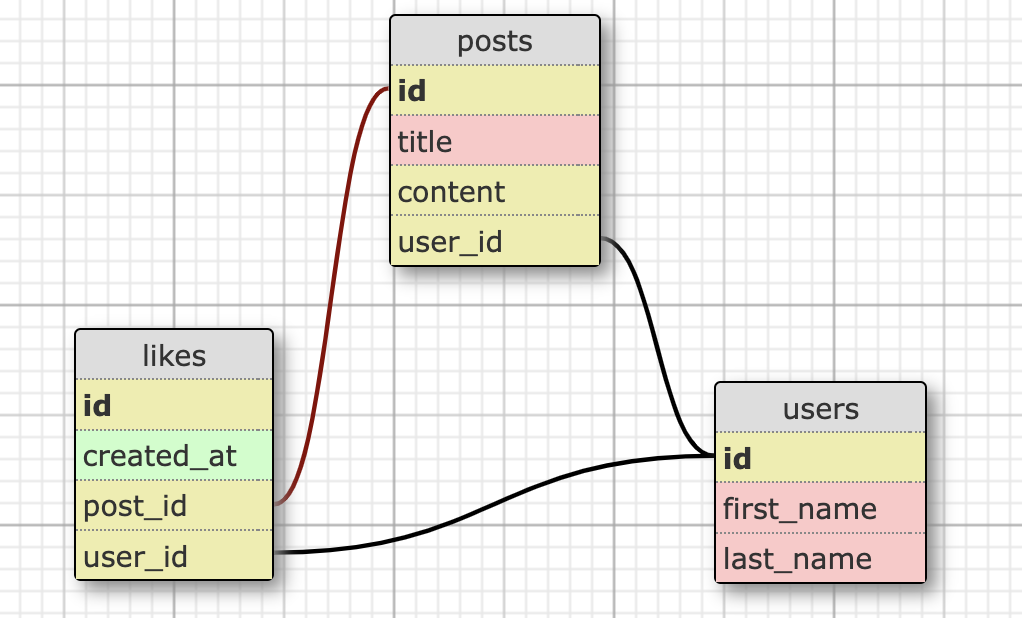

---
## 2. Most liked posts

Complete the code to get **the 3 most liked posts**:

In [7]:
import sqlite3

conn = sqlite3.connect("data/blog.sqlite")
c = conn.cursor()

# TODO: write the query
query = """
    SELECT 
        posts.id,
        posts.title,
        COUNT(likes.id) as num
    FROM posts 
    JOIN likes ON likes.post_id = posts.id 
    GROUP BY posts.id 
    ORDER BY num DESC
    LIMIT 3
"""

# TODO: Execute the query
c.execute(query)

# TODO: Fetch and print the results
c.fetchall()

[(143, 'Half imagine another.', 84),
 (83, 'Side foot leader popular.', 82),
 (99, 'Area paper whatever mean.', 81)]

---

### Pretty Print using _pandas_

The readbility of our `print()` statements is not so good.

Next week, we will introduce [pandas](https://pandas.pydata.org/) which will vastly improve the UX of our data exploration in Notebooks.

Execute the following cell to load `pandas` library:

In [8]:
import pandas as pd

Then try the previous `query` again, delegating the job of fetching results + displaying them to the `read_sql_query` function of `pandas`:

In [9]:
pd.read_sql_query(query, conn)

,id,title,num
0,143,Half imagine another.,84
1,83,Side foot leader popular.,82
2,99,Area paper whatever mean.,81


---
## 3. Find the three users who 'liked' the most

In [10]:
query = """
    SELECT 
        users.id,
        users.first_name || " " || users.last_name AS full_name,
        COUNT(*) AS num_likes
    FROM likes
    JOIN users ON likes.user_id = users.id
    GROUP BY users.id 
    ORDER BY num_likes DESC
    LIMIT 3
"""

pd.read_sql_query(query, conn)

,id,full_name,num_likes
0,43,Michael Allen,236
1,12,Donna Ramirez,233
2,44,Hayley Williams,227


---
## 4. Find the most liked author

In [11]:
query = """
    SELECT 
        users.id,
        users.first_name || " " || users.last_name AS full_name,
        COUNT(likes.id) as like_count
    FROM users
    JOIN posts ON users.id = posts.user_id 
    JOIN likes ON posts.id = likes.post_id
    GROUP BY users.id
    ORDER BY like_count DESC
    LIMIT 1
"""

pd.read_sql_query(query, conn)

,id,full_name,like_count
0,57,Teresa Moore,647


---
## 5. Who are the authors of the 3 most liked posts?

In [ ]:
query = """

"""

pd.read_sql_query(query, conn)

---
## 6. How many people liked at least one post?

In [ ]:
query = """

"""

pd.read_sql_query(query, conn)

---
## 7. Compute the cumulative number of likes per day

In [ ]:
query = """

"""

pd.read_sql_query(query, conn)

---
## 8. (Optional) Who's the biggest fan/ fans of each author?

The biggest fan/ fans of an author is defined as the user or users who liked the author's posts the most. i.e. if there is a tie between fans that both liked an author 20 times, both fans should be returned alongside their like count and the author in question.
<br><br>
<details>
    <summary>💡 Click for Hint</summary>
    You might need to use <code>WITH</code>
</details>


In [ ]:
query = """

"""

pd.read_sql_query(query, conn)